In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob, re, h5py

BASE_FOLDER = "./raw"
cities = [re.search(r".*/([A-Z]+)", s).group(1) for s in glob.glob(f"{BASE_FOLDER}/*/")]
print(cities)


['MOSCOW', 'BARCELONA', 'ANTWERP', 'BANGKOK']


In [2]:
from utils.h5utils import load_h5_file

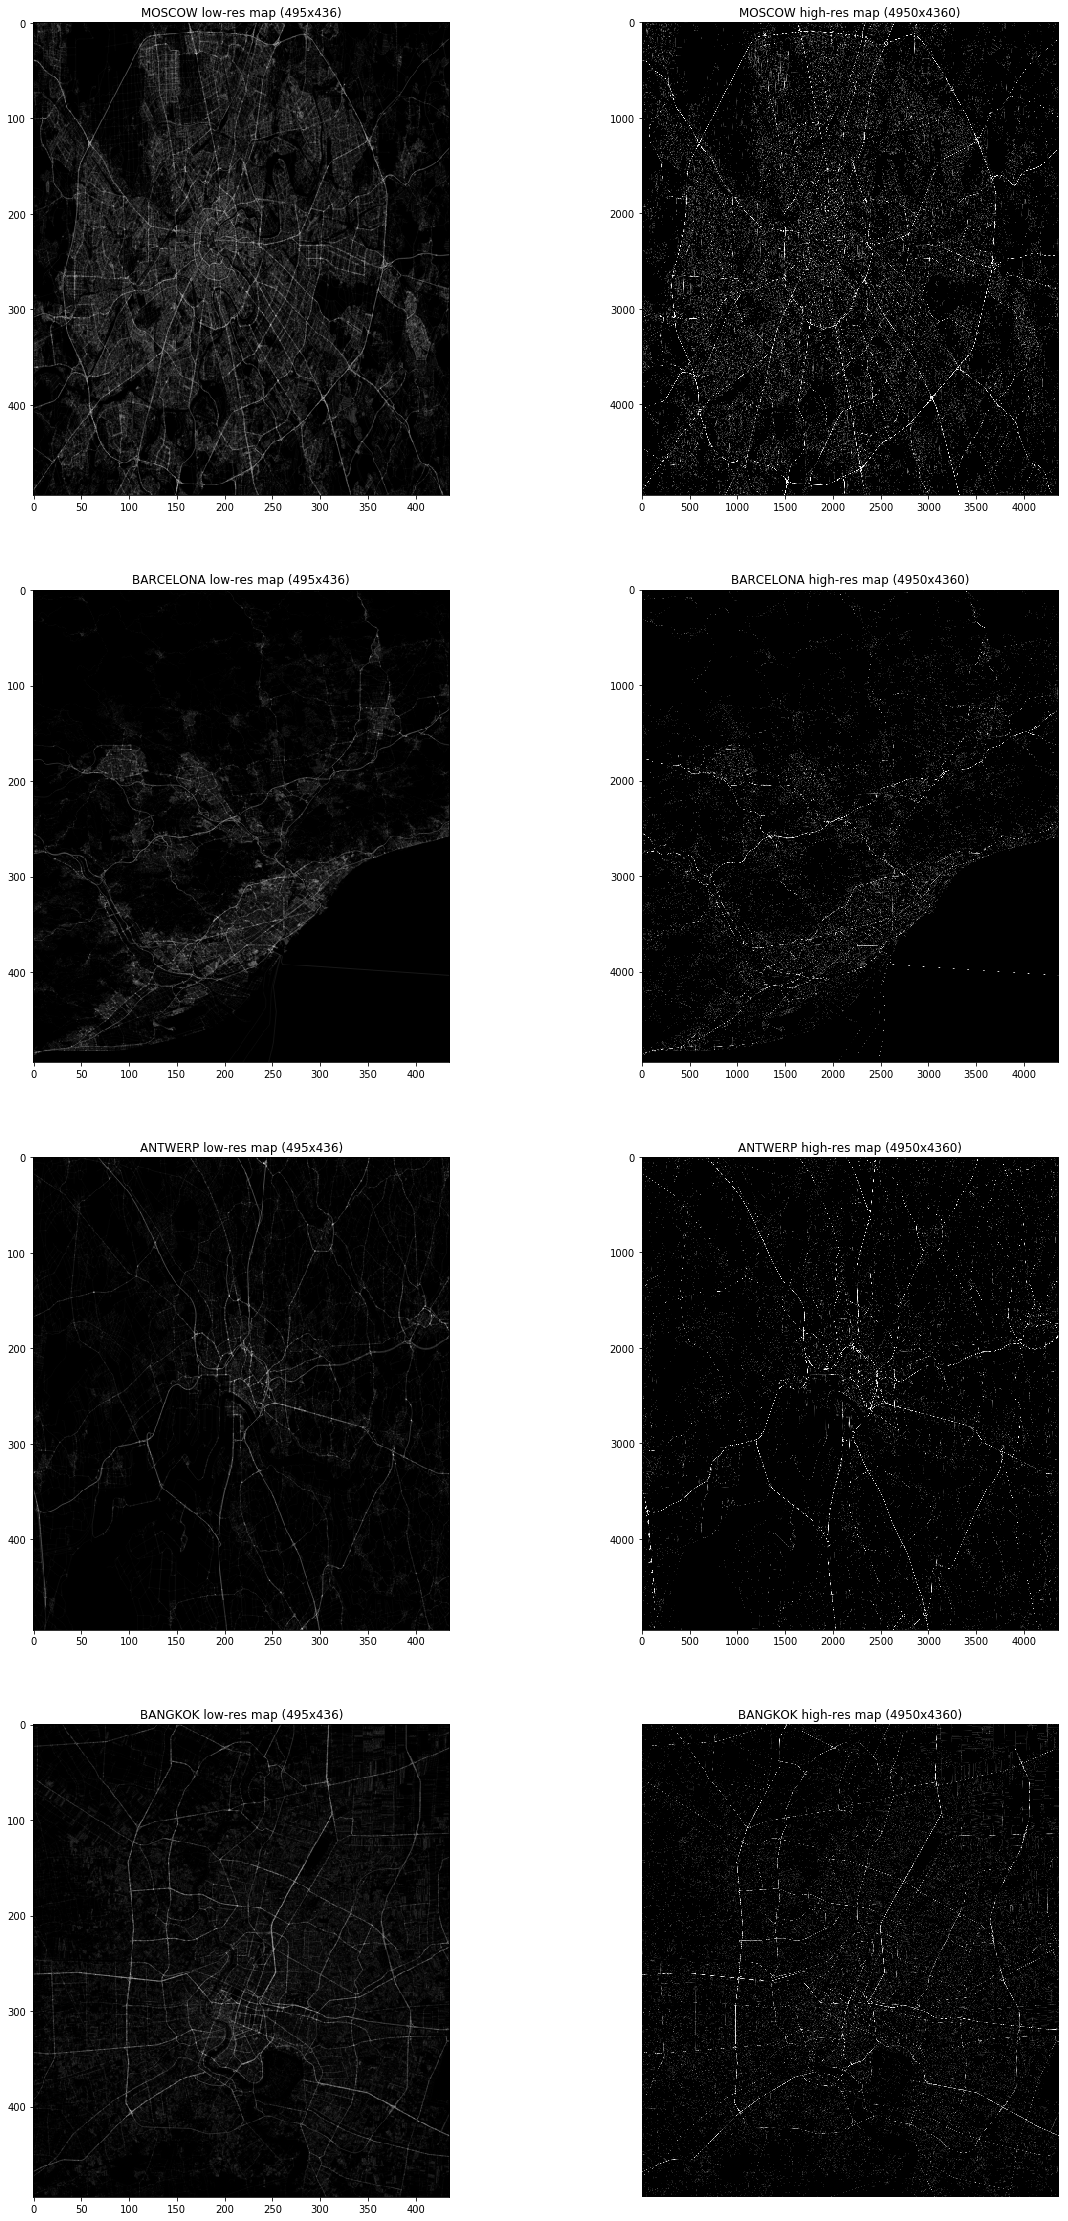

In [3]:
rows = len(cities)
cols = 2
scale_factor = 10
fig, axs = plt.subplots(rows, cols, figsize=(cols * scale_factor, rows * scale_factor))

for i, city in enumerate(cities):
    static_mask_once = load_h5_file(f"{BASE_FOLDER}/{city}/{city}_static.h5")[0]
    axs[i, 0].set_title(f"{city} low-res map (495x436)")
    axs[i, 0].imshow(static_mask_once[0:495, 0:436], cmap="gray", vmin=0, vmax=255)
    base_map = load_h5_file(f"{BASE_FOLDER}/{city}/{city}_map_high_res.h5")
    plt.axis("off")
    axs[i, 1].imshow(base_map[0:4950, 0:4360], cmap="gray", vmin=0, vmax=255)
    axs[i, 1].set_title(f"{city} high-res map (4950x4360)")
plt.show()

In [5]:
city = "MOSCOW"

static_map_with_mask = load_h5_file(f"{BASE_FOLDER}/{city}/{city}_static_with_region_layer.h5")

In [6]:
static_map_with_mask.shape

(10, 495, 436)

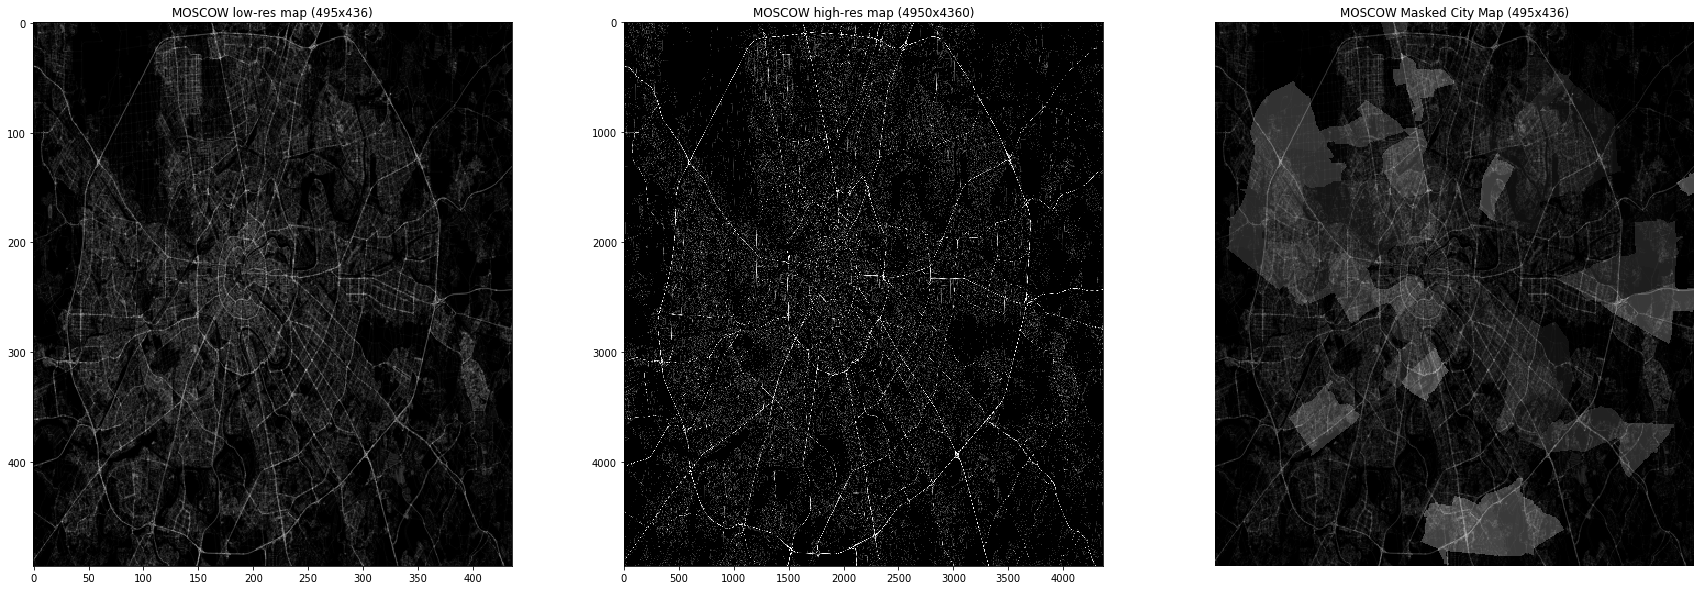

In [7]:
rows = 1
cols = 3
scale_factor = 10
fig, axs = plt.subplots(rows, cols, figsize=(cols * scale_factor, rows * scale_factor))

static_mask_once = load_h5_file(f"{BASE_FOLDER}/{city}/{city}_static.h5")[0]
axs[0].set_title(f"{city} low-res map (495x436)")
axs[0].imshow(static_mask_once[0:495, 0:436], cmap="gray", vmin=0, vmax=255)
base_map = load_h5_file(f"{BASE_FOLDER}/{city}/{city}_map_high_res.h5")
plt.axis("off")
axs[1].imshow(base_map[0:4950, 0:4360], cmap="gray", vmin=0, vmax=255)
axs[1].set_title(f"{city} high-res map (4950x4360)")
static_map_mask = static_map_with_mask[-1]
axs[2].imshow(static_mask_once[0:495, 0:436], cmap="gray", vmin=0, vmax=255)
axs[2].imshow(static_map_mask[0:495, 0:436], cmap="gray", vmin=0, vmax=255, alpha=0.3)
axs[2].set_title(f"{city} Masked City Map (495x436)")

plt.show()

In [8]:
import pandas as pd
import numpy as np

regions_mask_values = np.unique(static_map_mask)
regions_mask_values

array([  0,   5,  10,  14,  19,  24,  29,  34,  38,  43,  48,  53,  58,
        63,  67,  72,  77,  82,  87,  91,  96, 101, 106, 111, 115, 120,
       125, 130, 135, 140, 144, 149, 154, 159, 164, 168, 173, 178, 183,
       188, 192, 197, 207, 212, 217, 221, 231, 236, 241], dtype=uint8)

In [9]:
region_indices = []
for index, region in enumerate(regions_mask_values):
    indices = np.argwhere(static_map_mask == region)
    region_indices.append({region: indices})